<a id=0></a>
# 9.Regression Models
※　代表的な回帰分析モデルの紹介  
※　モデルの評価、交差検証、パラメータのグリッドサーチ

---
### [1. 探索的データ分析（EDA）](#1)
### [2. LinearRegression](#2)
### [3. RandomForestRegressor](#3)
### [4. KNeighborsRegressor](#4)
### [5. モデルの評価](#5)
### [6. クロスバリデーションとグリッドサーチ](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="talk", style="darkgrid", font="HackGen")

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA）¶

* 糖尿病のデータセット
* 分布の確認
* 相関関係
* トレインデータ、テストデータ

糖尿病のデータセット

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
# このようにndarrayとして取り出して使っていくこともできる
X, y = load_diabetes(return_X_y=True)

In [5]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [6]:
Xy = np.concatenate([X, y.reshape(-1, 1)], axis=1)

In [7]:
Xy.shape

(442, 11)

In [8]:
type(diabetes["feature_names"])
# listであるため、足し合わせで合成することができる

list

In [9]:
df = pd.DataFrame(Xy, columns=diabetes["feature_names"] + ["target"])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
df.describe()
# meanはほぼ０で揃っている

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
# カテゴリカルなsexを確認
df["sex"].unique()

array([ 0.05068012, -0.04464164])

分布の確認

In [14]:
def plot_data(feature):  # 引数は特徴量のラベル
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
    # sex別に分布を確認
    sns.histplot(data=df, x=feature, hue="sex", multiple="dodge", ax=axes[0])
    # 長いレジェンドを非表示に
    axes[0].legend([], frameon=False)
    # sex別に分布、外れ値を確認
    sns.boxplot(data=df, x="sex", y=feature, width=0.5, ax=axes[1])
    # 長いラベルを非表示に
    axes[1].set_xticklabels([])
    # targetとの関係を確認
    sns.scatterplot(data=df, x=feature, y=y, hue="sex", alpha=0.7, ax=axes[2])
    axes[2].legend([], frameon=False)
    plt.suptitle(feature)
    plt.show()

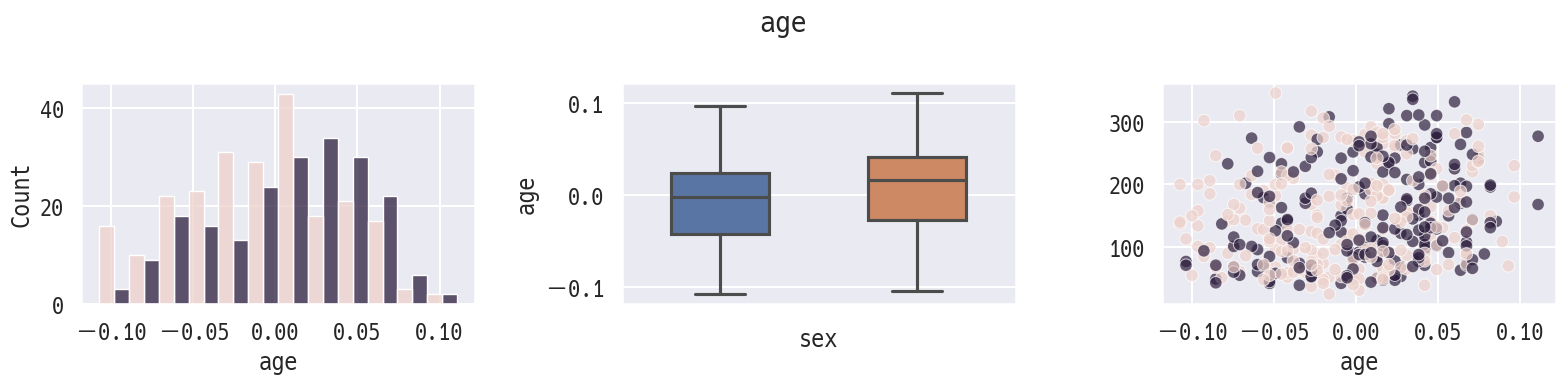

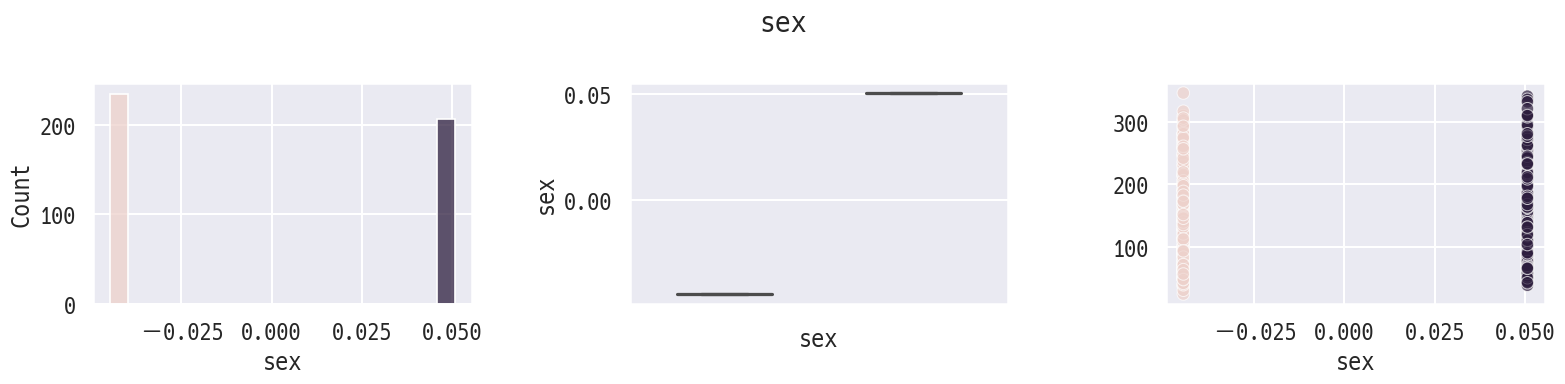

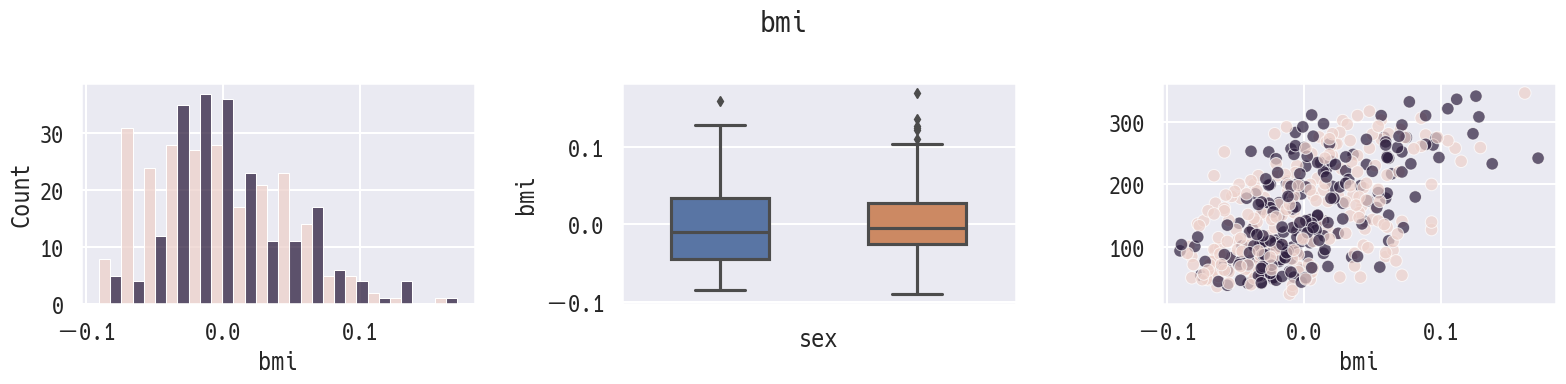

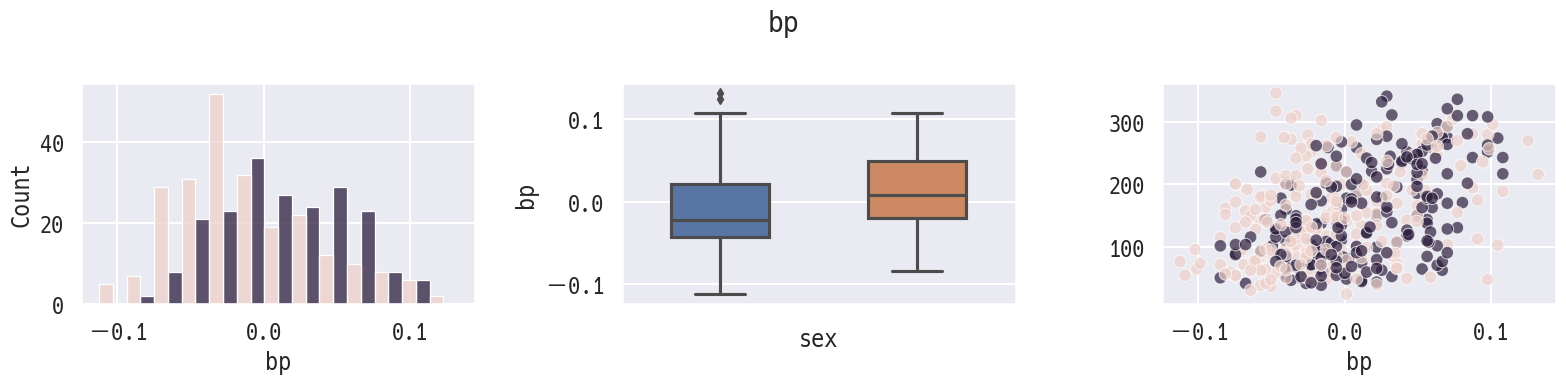

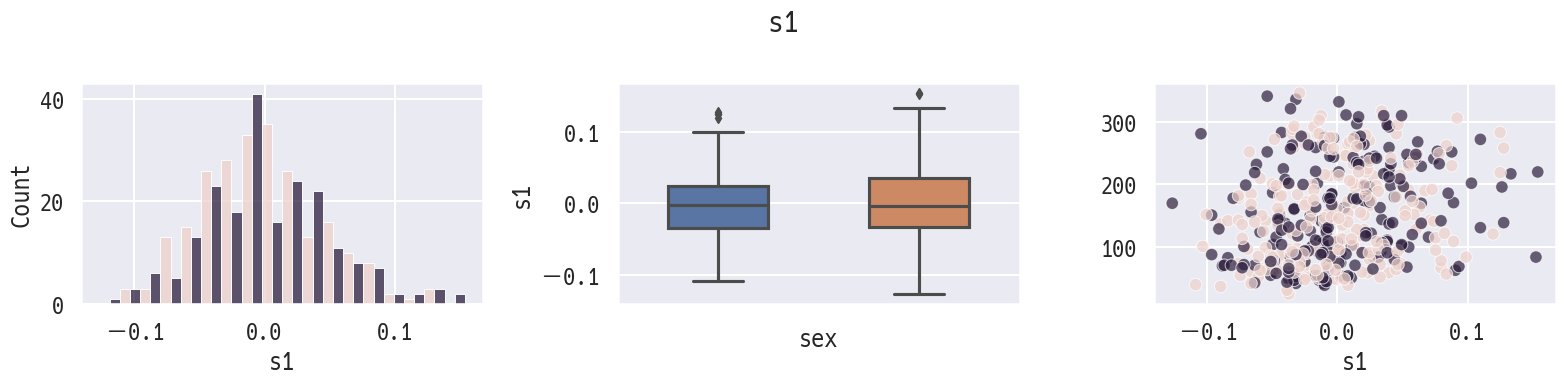

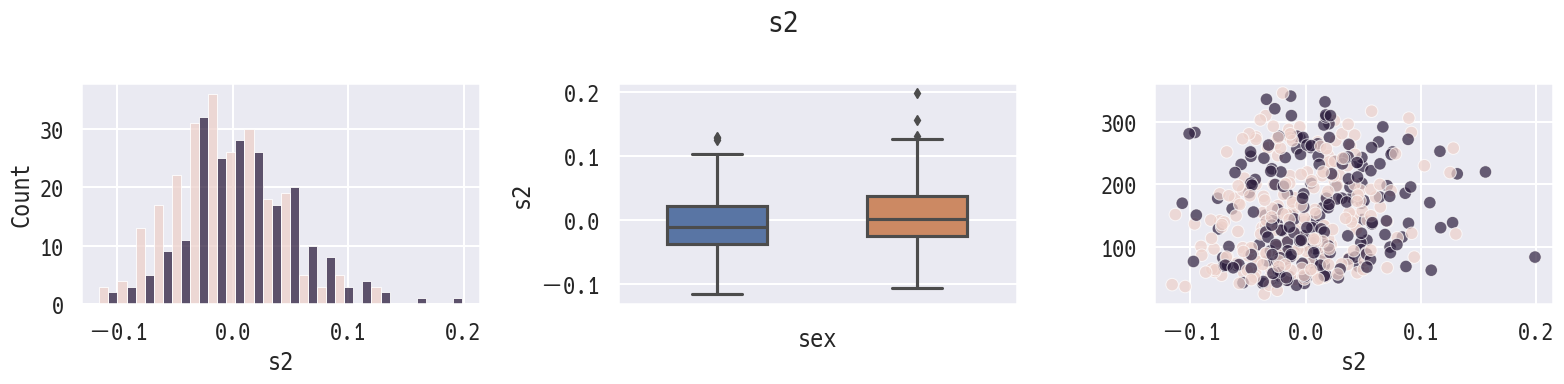

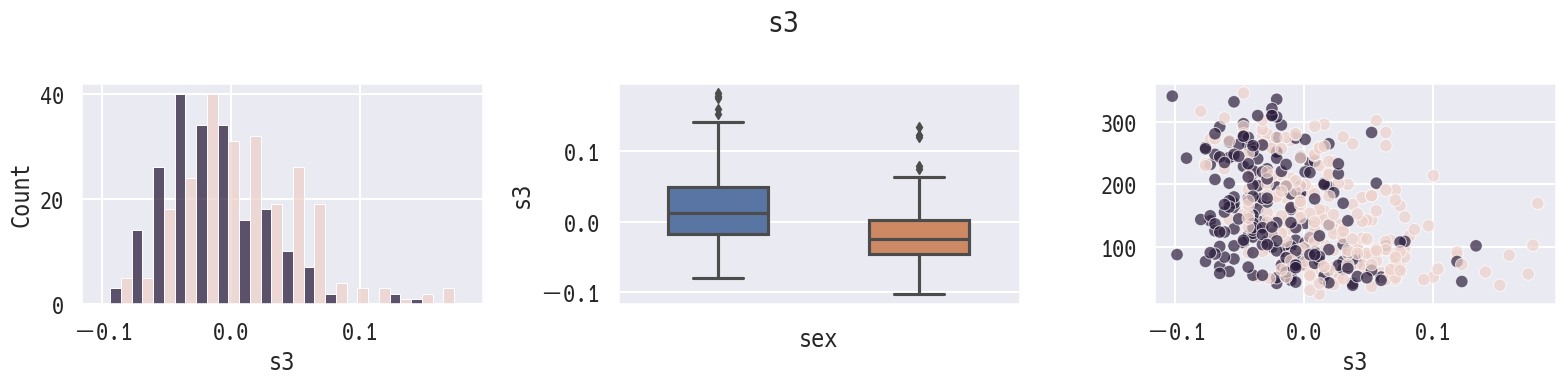

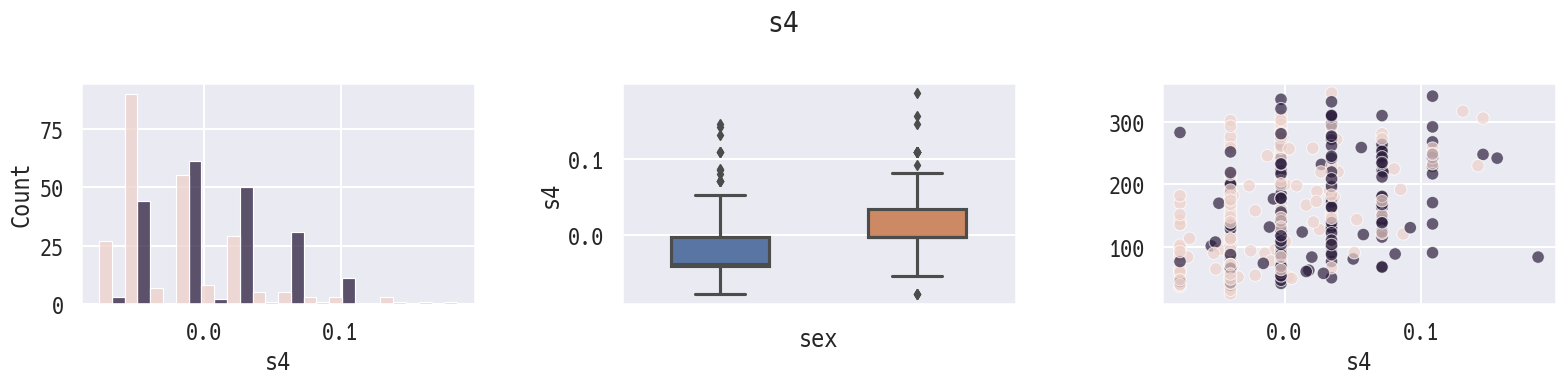

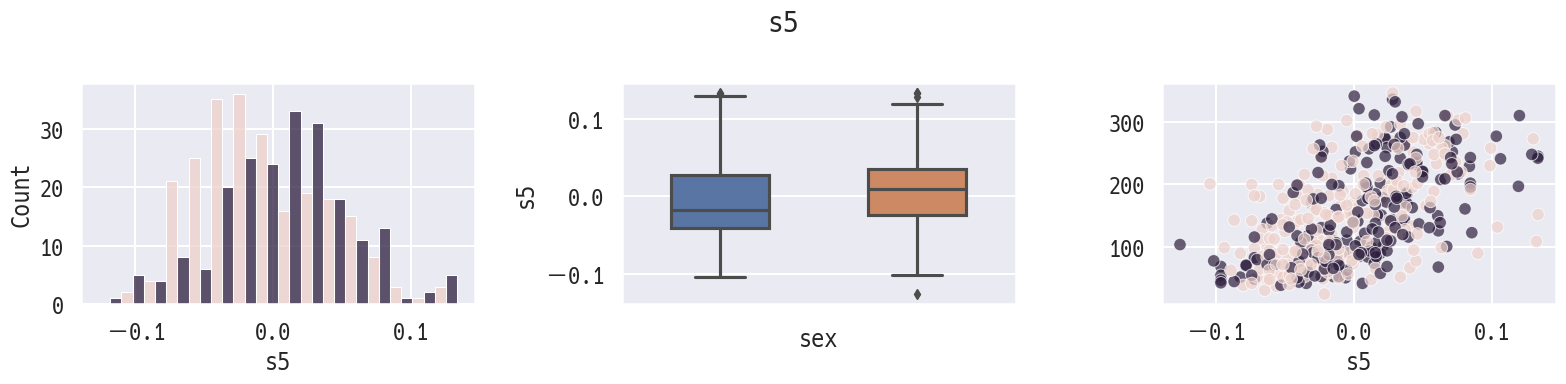

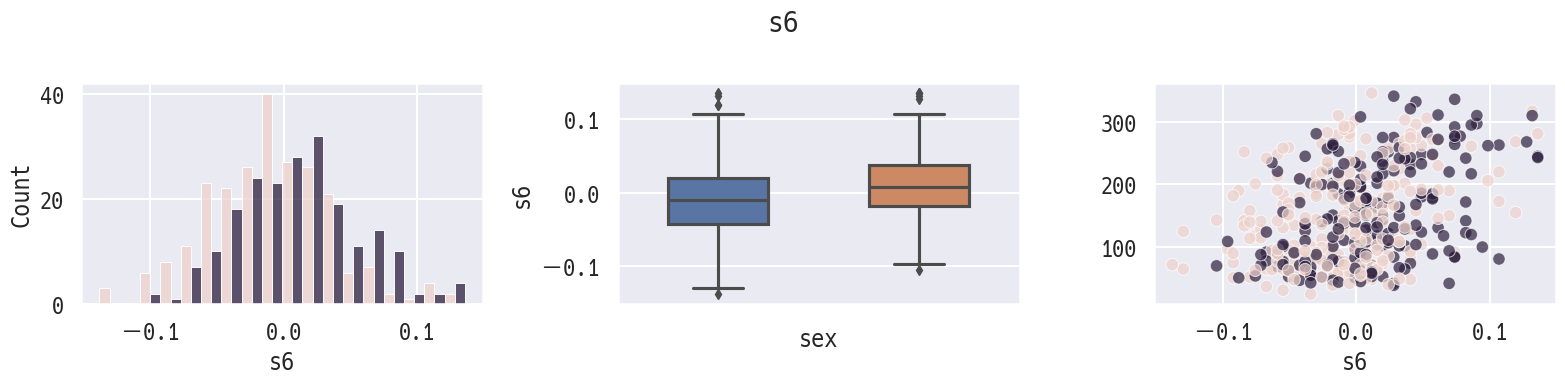

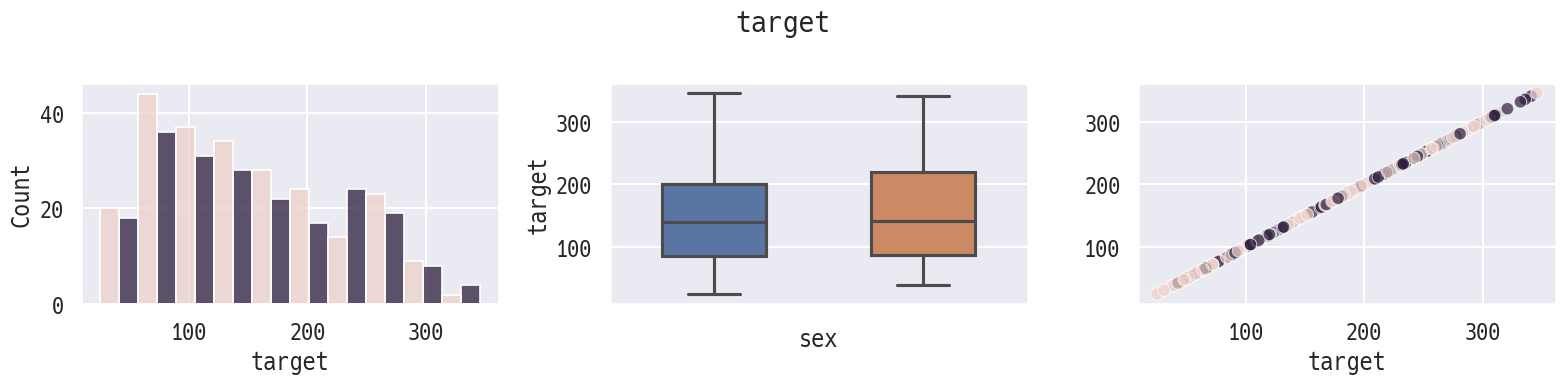

In [15]:
for feature in df.columns:
    plot_data(feature)

相関関係

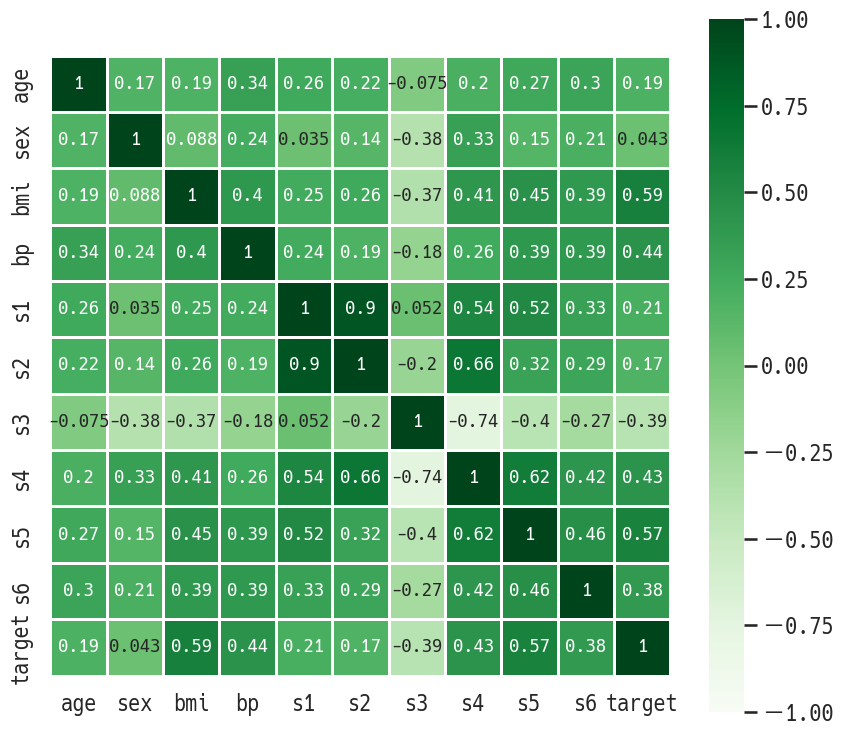

In [16]:
plt.figure(figsize=(10, 9))
sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={"size": 14},
    cmap="Greens",
    square=True,
    linewidth=1,
    vmin=-1,
)
plt.show()

性別で分けてみる

In [18]:
df_s0 = df[df["sex"] > 0].drop(columns=["sex"], axis=0)
df_s1 = df[df["sex"] < 0].drop(columns=["sex"], axis=0)

In [19]:
df_s0.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
6,-0.045472,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0


トレインデータ、テストデータ

In [20]:
from sklearn.model_selection import train_test_split

# 全体 sex0, sex1でtrain, testデータに分割していく

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17, shuffle=True
)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [23]:
X0_train, X0_test, y0_train, y0_test = train_test_split(
    df_s0.iloc[:, :-1], df_s0.iloc[:, -1], test_size=0.3, random_state=17
)

In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    df_s1.iloc[:, :-1], df_s1.iloc[:, -1], test_size=0.3, random_state=17
)

---
<a id=2></a>
[Topへ](#0)

---
## 2. LinearRegression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 性別ごとのデータで試してみる
---

モデルのインポート

In [25]:
from sklearn.linear_model import LinearRegression

モデルインスタンスの作成

In [26]:
# パラメータの変更はほぼ必要ない
lr_model = LinearRegression()

モデルの構築・属性・予測・スコア

In [27]:
# 訓練データに対して適合、学習させる
lr_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# 予測を行う
lr_pred = lr_model.predict(X_test)
lr_pred

array([177.43299832, 235.00503399,  95.42904239, 100.93741348,
       100.65578177,  66.43327209, 113.84109238, 104.45904834,
       150.21311693,  63.9912934 , 230.75607311, 128.83750176,
       104.13547879, 118.66981015, 184.9736666 , 266.66163121,
       177.13376824, 152.08783627, 256.24660976, 178.51041104,
       194.5749372 , 244.87991146, 199.44182722,  95.40129031,
       134.05254017, 192.57373758,  61.06295915, 167.01451475,
        67.62022052, 250.83755407, 136.70445311,  39.61529291,
        75.51135788, 214.16823867, 139.5917269 , 173.96155587,
        54.40729988, 211.30411991,  96.30531847, 202.66420057,
        81.80718121, 110.36606275, 183.80087979, 251.39268338,
       144.94581404,  79.04769012, 229.58095446, 121.5861312 ,
       192.4532645 , 179.63698899, 177.54265819, 158.79064467,
       169.81700533, 137.82772066, 162.05757117, 144.30517687,
        99.81038228, 316.45563871, 139.84968305, 173.16314378,
       163.56606392, 213.23144902,  50.21077197, 144.75

In [29]:
# 係数、傾き
lr_model.coef_

array([  31.55537643, -366.71859113,  490.82617701,  305.01986056,
        -12.9629019 , -211.37683435, -221.56778356,  219.12712275,
        497.68549475,   62.88281073])

In [30]:
# 切片
lr_model.intercept_

151.99058066224876

In [31]:
test = np.array(
    [
        0.7076875,
        -0.04464164,
        0.01211685,
        0.04252958,
        0.07135654,
        0.0534871,
        0.05232174,
        -0.00259226,
        0.02539313,
        -0.0052198,
    ]
).reshape(1, -1)

pred_0 = lr_model.predict(test)
pred_0

array([197.5302678])

In [32]:
# y = a1x1 + a2x2 + ... + a10x10 + b
pred_1 = lr_model.intercept_  # 切片だけ

# 係数＊値を足し合わせていく
for i in range(10):
    pred_1 += lr_model.coef_[i] * test[0, i]

pred_1

197.5302677978028

実測値と予測値の比較

In [33]:
df_result = pd.DataFrame()
df_result["true_value"] = y_test
df_result["prediction"] = lr_pred
df_result["residual"] = y_test - lr_pred
# true_valueで昇順に並べ替え
df_result_sorted = df_result.sort_values("true_value", ignore_index=True)

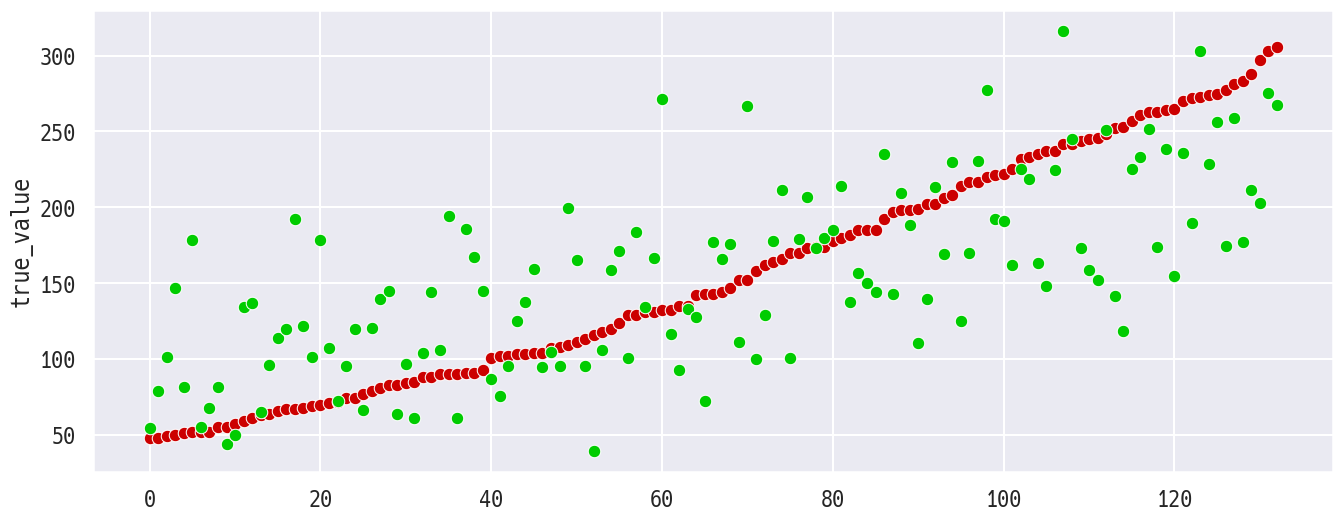

In [34]:
plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=df_result_sorted,
    x=df_result_sorted.index,
    y="true_value",
    color="#c00",  # 実測値が赤
)
sns.scatterplot(
    data=df_result_sorted,
    x=df_result_sorted.index,
    y="prediction",
    color="#0c0",  # 予測値が緑
)
plt.show()

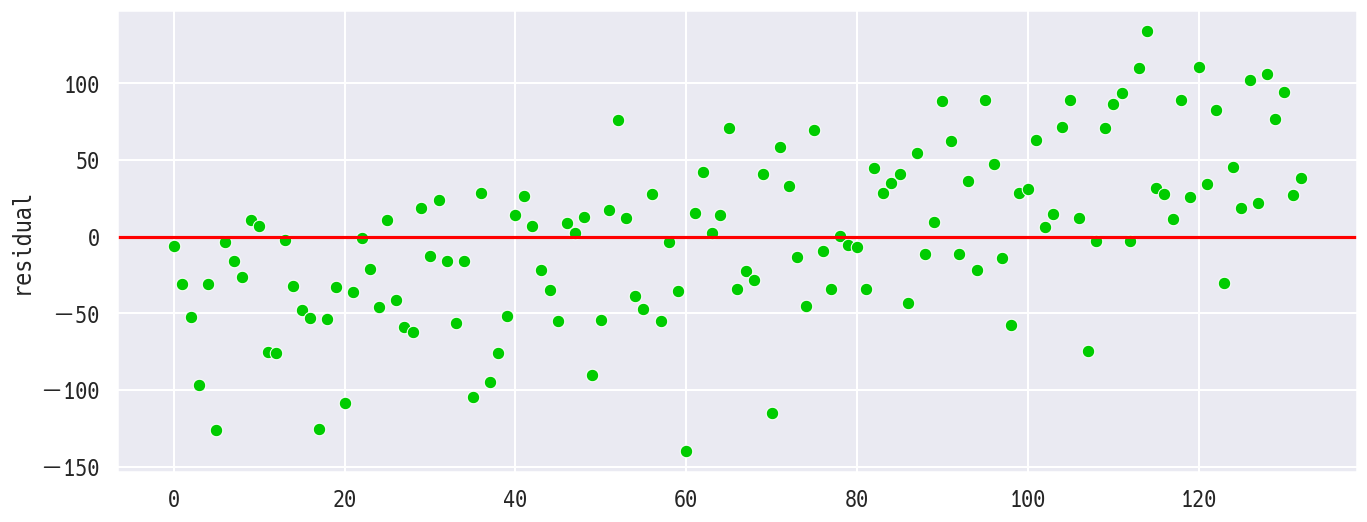

In [35]:
# yに残差を設定してプロット
plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=df_result_sorted,
    x=df_result_sorted.index,
    y="residual",
    color="#0c0",  # 残差は緑で示す
)
plt.axhline(0, color="#f00")  # 基準。y=0, 赤
plt.show()

In [36]:
# このスコアはR二乗値、R２スコア
lr_model.score(X_test, y_test)

# 精度を示す。1が100%

0.4653088132347174

In [37]:
# fitに用いたデータに対しても過度に高い数値にはならなかった
lr_model.score(X_train, y_train)

0.5213195909524873

性別ごとのデータで試してみる

In [38]:
# こちらの性別ではテストでも0.547という結果を得ることができた
lr_model_s0 = LinearRegression()
lr_model_s0.fit(X0_train, y0_train)
lr_model_s0.score(X0_test, y0_test), lr_model_s0.score(X0_train, y0_train)

(0.5472026714756055, 0.5955480185654833)

In [39]:
lr_model_s1 = LinearRegression()
lr_model_s1.fit(X1_train, y1_train)
lr_model_s1.score(X1_test, y1_test), lr_model_s1.score(X1_train, y1_train)

(0.5210267736804213, 0.4558535970823838)

---
<a id=3></a>
[Topへ](#0)

---
## 3. RandomForestRegressor

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* パラメータを変更してみる
* Treeの可視化
---

モデルのインポート

In [40]:
from sklearn.ensemble import RandomForestRegressor

# アンサンブルとは複数人で演奏すること→複数のモデルが構築され、それらを寄せあわせて最良な解を判断する事ができる

モデルインスタンスの作成

In [41]:
rf_model = RandomForestRegressor(
    n_estimators=100,  # DecisionTreeRegressorの数
    max_depth=None,  # 分岐を最大何回まで行うか
    min_samples_split=2,  # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,  # 末端での最小のサンプル数
    max_features=1.0,  # 最大いくつの特徴量を使うか。1は100%。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,  # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=None,  # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

モデルの構築・属性・予測・スコア

In [42]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [43]:
rf_pred = rf_model.predict(X_test)
rf_pred[:5]

array([177.29, 221.03,  95.38, 127.42, 111.14])

In [44]:
# estimatorを確認
rf_model.base_estimator_

/Users/sean/Documents/myscript/python-data-analytics-udemy-business/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeRegressor()

In [45]:
# 重要度の高さを取得
# index=8, 's5'が最も重要のよう
rf_model.feature_importances_

array([0.06286879, 0.02094875, 0.23385147, 0.08764819, 0.04107012,
       0.05116433, 0.05610629, 0.02369583, 0.34937982, 0.07326641])

In [46]:
rf_model.score(X_test, y_test)

0.49161172426003963

In [47]:
rf_model.score(X_train, y_train)
# 訓練データに対しては過度に高い精度。新規、未知のデータには精度が低い => 過学習(overfitting)している
# 汎化性能(新規のデータに対しても同程度の精度がある)が低い

0.9198706580063137

パラメータを変更してみる

In [48]:
# 特に根拠があるわけではない変更です
rf_model_new = RandomForestRegressor(
    n_estimators=120,  # DecisionTreeRegressorの数
    max_depth=4,  # 分岐を最大何回まで行うか
    min_samples_split=5,  # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,  # 末端での最小のサンプル数
    max_features=0.6,  # 最大いくつの特徴量を使うか。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,  # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=0.7,  # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

In [49]:
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
rf_pred_new[:5]

array([176.37411581, 219.15230835,  98.60710126, 110.40610849,
       106.5296587 ])

In [50]:
rf_model_new.score(X_test, y_test)

0.5116264791328704

In [51]:
rf_model_new.score(X_train, y_train)
# 過学習が抑えられ（？）、さらに汎化性能もわずかに向上したと考えられる

0.6376734717657231

Treeの可視化

In [52]:
# ひとつ目のDecisionTreeRegressor
rf_model.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1265576559)

In [53]:
from sklearn.tree import plot_tree

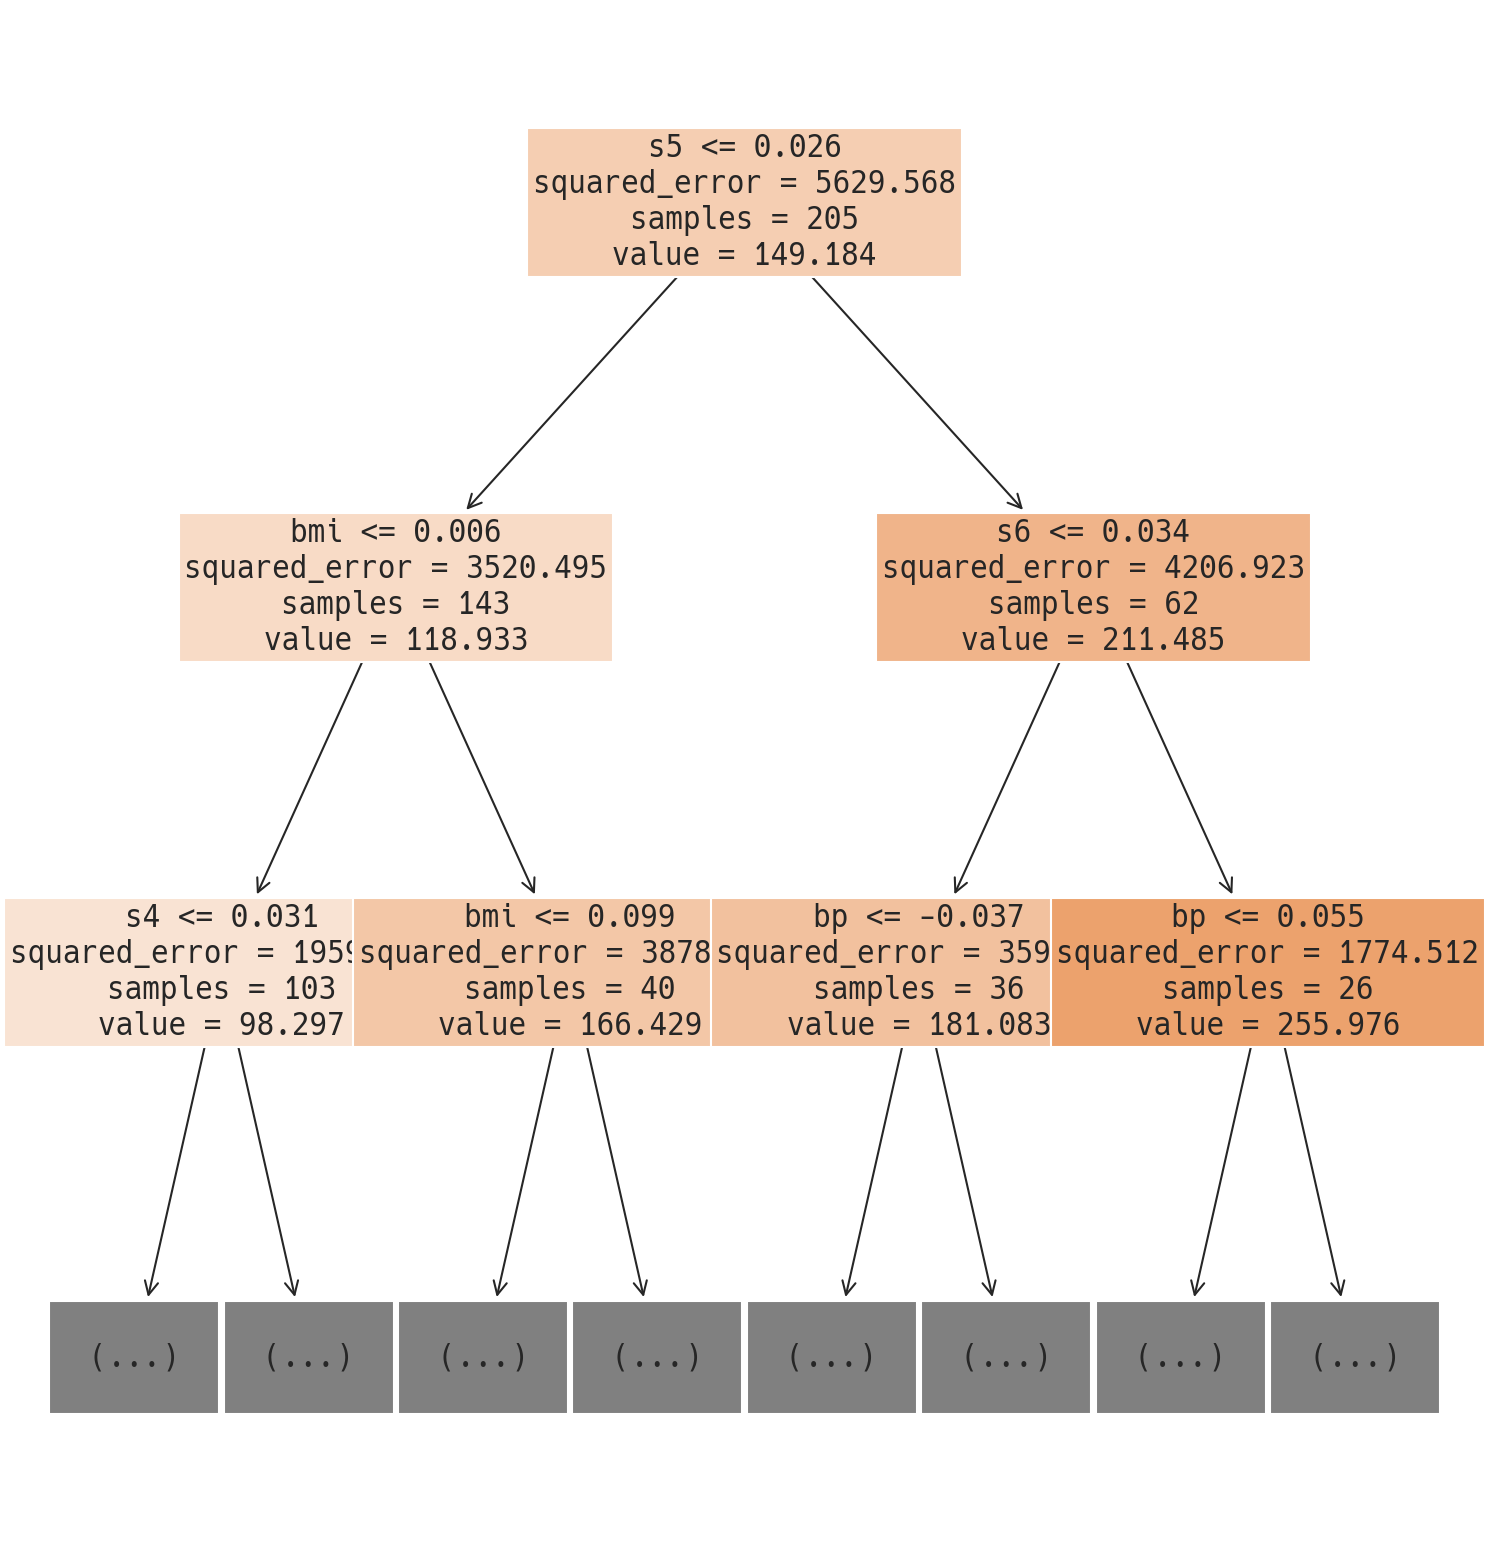

In [56]:
plt.figure(figsize=(18, 20))
plot_tree(
    rf_model.estimators_[0],
    max_depth=2,
    fontsize=24,
    feature_names=diabetes["feature_names"],
    filled=True,
)
# filled:色分け
plt.show()

---
<a id=4></a>
[Topへ](#0)

---
## 4. KNeighborsRegressor

* モデルのインポート  
     https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
* モデルインスタンスの作成・スコア
* パラメータを変更してみる
---

モデルのインポート

In [57]:
from sklearn.neighbors import KNeighborsRegressor

モデルインスタンスの作成・スコア

In [58]:
kn_model = KNeighborsRegressor(n_neighbors=5, weights="uniform")
# 近傍、類似の5つのデータから数値を予測する
# 'distance'は距離の近い、遠いで重みづけを変える

In [59]:
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)
kn_pred[:5]

array([161.4, 186.6, 100.4, 125. , 120.2])

In [60]:
kn_model.score(X_test, y_test)

0.39363769594293097

In [61]:
kn_model.score(X_train, y_train)

0.5679093128613815

パラメータを変更してみる

In [62]:
kn_model_new = KNeighborsRegressor(n_neighbors=12, weights="uniform")

In [63]:
kn_model_new.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [64]:
kn_model_new.score(X_test, y_test)

0.4797261727192119

In [65]:
kn_model_new.score(X_train, y_train)

0.5215812278605085

---
<a id=5></a>
[Topへ](#0)

---
## 5. モデルの評価方法

* 評価指標
* モデルを評価する
* R2スコア(決定係数)とは
---

評価指標  
絶対平均誤差　/　二乗平均誤差　/　絶対パーセント誤差　/　R二乗値（決定係数）

In [66]:
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,  # 絶対平均誤差
    mean_squared_error,  # 二乗平均誤差
    mean_absolute_percentage_error,  # 絶対％誤差
    r2_score,  # R二乗値
)

モデルを評価する  

In [67]:
def eval_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        pred = np.round(model.predict(X_test))
        score = np.round(model.score(X_test, y_test), 4)
        mae = np.round(mean_absolute_error(y_test, pred), 4)
        mse = np.round(mean_squared_error(y_test, pred), 4)  # 2乗するため、誤差の大きさが目立つようになる
        mape = np.round(
            mean_absolute_percentage_error(y_test, pred), 4
        )  # 予測値のスケールに寄らず、相対的に理解できる
        r2 = np.round(r2_score(y_test, pred), 4)
        print(f"{model}")
        print(f"score : {score}, mae : {mae}, mse : {mse}, mape : {mape}, r2 : {r2}")
        print("================================")


# model.score()とr2_score()は同じもの

In [68]:
models = [lr_model, rf_model_new, kn_model_new]
eval_models(models, X_train, y_train, X_test, y_test)

LinearRegression()
score : 0.4653, mae : 43.8271, mse : 3041.8271, mape : 0.363, r2 : 0.4654
RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17)
score : 0.5116, mae : 43.3158, mse : 2778.8195, mape : 0.3646, r2 : 0.5117
KNeighborsRegressor(n_neighbors=12)
score : 0.4797, mae : 43.7744, mse : 2964.782, mape : 0.3625, r2 : 0.479


R2スコア(決定係数)とは

* $R2 = 1 - \frac{\sum{( true\ value_i - pred\ value_i ) ^ 2}}{\sum{( true\ value_i - true\ value_{mean} ) ^ 2}}$
* 1に近いほど回帰式の精度が高い
* もし、すべてを「平均」で予想した場合(最も安易な？予想)　=> R2 = 0
* 0.5以上：予測精度がそれなりに高いと言える
* 0.7以上：予測精度が高い
* 0.9以上：精度が非常に高い。ただし、過学習でないかの検討も必要  
※　絶対的な基準は存在しません。あくまでも目安として用いる指標です

---
<a id=6></a>
[Topへ](#0)

---
## 6. クロスバリデーションとグリッドサーチ

* KFold  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* cross_val_score  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* GridSearchCV  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

KFold

In [69]:
# クロスバリデーション → 交差検証。複数のトレインセットで検証する

from sklearn.model_selection import KFold, cross_val_score

In [86]:
# 元のデータを複数のtrain, testデータの組に分割する
k = KFold(
    5, # いくつに分割するか
    shuffle=True,
    random_state=17
)

In [87]:
set1, set2, set3, set4, set5 = k.split(X)

In [88]:
# トレイン、テストが含まれる
set1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  15,  17,  18,  19,  21,  22,  23,  24,  26,  27,  28,  30,
         31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  43,  44,  45,
         46,  47,  48,  49,  50,  53,  54,  55,  56,  57,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  72,  73,  74,  75,  76,
         77,  78,  79,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  96,  97,  98, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 110, 111, 114, 115, 116, 117, 118, 119, 120, 121, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 135, 137, 138, 139, 140,
        141, 143, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174,
        175, 176, 177, 178, 179, 180, 182, 184, 185, 186, 188, 190, 191,
        192, 193, 194, 195, 196, 198, 201, 202, 203, 204, 205, 206, 208,
        209, 210, 212, 213, 214, 216, 217, 218, 220

In [89]:
len(set1[0]), len(set1[1])

(353, 89)

In [90]:
# ８：２で分割される
89 / 442

0.20135746606334842

cross_val_score

In [93]:
# 5つの組の平均値で比較する
for model in models:
    scores = cross_val_score(model, X, y, cv=k)  # X説明変数、y目的変数, cvクロスバリデーション回数(intを入れるとシャッフルが行われない)
    print(f"{model} : {scores.mean()}")
    print("\n")

LinearRegression() : 0.481206332787629


RandomForestRegressor(max_depth=4, max_features=0.6, max_samples=0.7,
                      min_samples_split=5, n_estimators=120, random_state=17) : 0.4499066561979134


KNeighborsRegressor(n_neighbors=12) : 0.44025966811911565




GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    "max_depth": [2, 6, 10],
    "max_features": [0.5, 0.9],
    "max_samples": [0.5, 0.9],
    "min_samples_split": [3, 6],
}
# 計24の組み合わせで結果を取得できる

In [94]:
grid = GridSearchCV(rf_model, param_grid=params, cv=k)
# return_train_score=Falseでトレインデータのスコアも確認できる

In [95]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(random_state=17),
             param_grid={'max_depth': [2, 6, 10], 'max_features': [0.5, 0.9],
                         'max_samples': [0.5, 0.9],
                         'min_samples_split': [3, 6]})

In [96]:
# データフレームで結果を表示
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049885,0.006711,0.002285,0.000335,2,0.5,0.5,3,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.449388,0.490840,0.412492,0.409724,0.407588,0.434006,0.032302,15
1,0.044431,0.003335,0.002153,0.000208,2,0.5,0.5,6,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.449388,0.490840,0.412492,0.409724,0.407588,0.434006,0.032302,15
2,0.043420,0.000927,0.001904,0.000038,2,0.5,0.9,3,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.455106,0.495932,0.410745,0.403327,0.389048,0.430832,0.039327,18
3,0.043521,0.000292,0.001905,0.000019,2,0.5,0.9,6,"{'max_depth': 2, 'max_features': 0.5, 'max_sam...",0.455106,0.495932,0.410745,0.403327,0.389048,0.430832,0.039327,18
4,0.047058,0.003990,0.002227,0.000505,2,0.9,0.5,3,"{'max_depth': 2, 'max_features': 0.9, 'max_sam...",0.448409,0.503710,0.420705,0.395270,0.417137,0.437046,0.037368,12
5,0.046531,0.001946,0.002160,0.000178,2,0.9,0.5,6,"{'max_depth': 2, 'max_features': 0.9, 'max_sam...",0.448409,0.503710,0.420705,0.395270,0.417137,0.437046,0.037368,12
6,0.051107,0.001797,0.002045,0.000178,2,0.9,0.9,3,"{'max_depth': 2, 'max_features': 0.9, 'max_sam...",0.441542,0.506872,0.404867,0.379031,0.386853,0.423833,0.046784,23
7,0.051959,0.002755,0.002011,0.000134,2,0.9,0.9,6,"{'max_depth': 2, 'max_features': 0.9, 'max_sam...",0.441542,0.506872,0.404867,0.379031,0.386853,0.423833,0.046784,23
8,0.050925,0.000588,0.002284,0.000093,6,0.5,0.5,3,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.456217,0.523827,0.400517,0.415636,0.456194,0.450478,0.042792,5
9,0.050780,0.001414,0.002291,0.000095,6,0.5,0.5,6,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.460306,0.520517,0.417933,0.407415,0.458881,0.453010,0.039885,2


In [81]:
pd.DataFrame(grid.cv_results_).loc[:, "params":].sort_values(
    "rank_test_score", ascending=True
)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.396759,0.544174,0.476403,0.393802,0.484039,0.459035,0.057112,1
12,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.395234,0.513929,0.472757,0.390271,0.485159,0.451470,0.049794,2
9,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.374052,0.524818,0.482861,0.378781,0.491895,0.450482,0.062084,3
17,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.376537,0.537032,0.458519,0.390790,0.489357,0.450447,0.060163,4
20,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.408640,0.501851,0.462817,0.388291,0.481904,0.448701,0.043315,5
21,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.391171,0.508834,0.473693,0.387657,0.481250,0.448521,0.049671,6
13,"{'max_depth': 6, 'max_features': 0.9, 'max_sam...",0.394117,0.515358,0.455251,0.381280,0.482148,0.445631,0.051152,7
16,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.364279,0.511016,0.464392,0.396427,0.489185,0.445060,0.055788,8
10,"{'max_depth': 6, 'max_features': 0.5, 'max_sam...",0.385307,0.516021,0.468771,0.382201,0.435774,0.437615,0.050850,9
19,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",0.382129,0.512022,0.473224,0.385301,0.434033,0.437342,0.050264,10


In [82]:
# 最適なパラメータ
grid.best_params_

{'max_depth': 6,
 'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_split': 3}

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---